In [28]:
#yctd sequence from https://www.uniprot.org/blast/?about=P04050[1549-1716]&key=Region
with open('yCTD24.txt', 'r') as f:
    f.readline()
    yctd24 = f.read().replace('\n', '')
print(yctd24)

YSPTSPAYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPAYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPGYSPGSPA


In [29]:
yctd_list = []
index = yctd24.index("Y", 1)
start = 0
while index>0:
    yctd_list.append(yctd24[start:index])
    start = index
#     print(index)
    index = yctd24.find("Y", index + 1)
yctd_list.append(yctd24[start:])
print(yctd_list)
    

['YSPTSPA', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPA', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPS', 'YSPTSPN', 'YSPTSPS', 'YSPTSPG', 'YSPGSPA']


In [4]:
# import csv
# with open("hctd52.csv", "w") as f:
#         writer = csv.writer(f, delimiter=',')
#         writer.writerow([1, 2, 3, 4, 5, 6, 7])
#         for i in hctd_list:
#             writer.writerow(i)

In [30]:
import pandas as pd
df = pd.DataFrame(list(i) for i in yctd_list)
df.to_csv("yctd24.csv", sep=',', index = False)

In [31]:
# df = pd.read_csv('hctd52.csv', error_bad_lines=False)
df = pd.read_csv('yctd24.csv')

In [34]:
df.iloc[:,2] #look at the third column

0     P
1     P
2     P
3     P
4     P
5     P
6     P
7     P
8     P
9     P
10    P
11    P
12    P
13    P
14    P
15    P
16    P
17    P
18    P
19    P
20    P
21    P
22    P
23    P
Name: 2, dtype: object

In [35]:
import numpy as np
for i in np.arange(7):
    print(f"The amino acid composition at position {i+1} is:\n", df.iloc[:,i].value_counts(), '\n')

The amino acid composition at position 1 is:
 Y    24
Name: 0, dtype: int64 

The amino acid composition at position 2 is:
 S    24
Name: 1, dtype: int64 

The amino acid composition at position 3 is:
 P    24
Name: 2, dtype: int64 

The amino acid composition at position 4 is:
 T    23
G     1
Name: 3, dtype: int64 

The amino acid composition at position 5 is:
 S    24
Name: 4, dtype: int64 

The amino acid composition at position 6 is:
 P    24
Name: 5, dtype: int64 

The amino acid composition at position 7 is:
 S    19
A     3
N     1
G     1
Name: 6, dtype: int64 



In [36]:
def aa_counter(column_index):
    amino_acids = []
    percentages = []
    for amino_acid in df.iloc[:,column_index].unique():
        amino_acids.append(amino_acid)
        aa_count = df.iloc[:,column_index].str.count(amino_acid).sum()
        total = len(df.iloc[:,column_index])
        percentage = aa_count/total*100
        percentages.append(percentage)
    return amino_acids, percentages


At position 1:
Y is: 100.0%

At position 2:
S is: 100.0%

At position 3:
P is: 100.0%

At position 4:
T is: 95.83333333333334%
G is: 4.166666666666666%

At position 5:
S is: 100.0%

At position 6:
P is: 100.0%

At position 7:
A is: 12.5%
S is: 79.16666666666666%
N is: 4.166666666666666%
G is: 4.166666666666666%


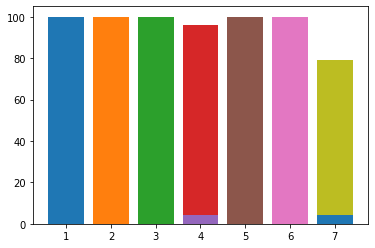

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in np.arange(7):
    amino_acids, percentages = aa_counter(i)    
    print(f"\nAt position {i+1}:")
    for amino_acid, percentage in zip(amino_acids, percentages):
        print(f"{amino_acid} is: {percentage}%")
        plt.bar(i+1, percentage)

In [41]:
from matplotlib.cm import get_cmap
colors = get_cmap('tab20').colors
# axes.set_prop_cycle(color=colors)
aa_colors = []
all_aa = list(set(yctd24))
print(all_aa)
for i, aa in enumerate(all_aa):
    print(i, aa)
    aa_colors.append(colors[i])
color_dict = {all_aa[i]: aa_colors[i] for i in range(len(all_aa))}
color_dict['Y'] = 'red'
color_dict['S'] = 'green'
color_dict['P'] = 'pink'
color_dict['T'] = 'blue'
color_dict

['A', 'Y', 'T', 'S', 'N', 'P', 'G']
0 A
1 Y
2 T
3 S
4 N
5 P
6 G


{'A': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Y': 'red',
 'T': 'blue',
 'S': 'green',
 'N': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'P': 'pink',
 'G': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}


At position 1:
Y is: 100.0%

At position 2:
S is: 100.0%

At position 3:
P is: 100.0%

At position 4:
T is: 95.83333333333334%
G is: 4.166666666666666%

At position 5:
S is: 100.0%

At position 6:
P is: 100.0%

At position 7:
A is: 12.5%
S is: 79.16666666666666%
N is: 4.166666666666666%
G is: 4.166666666666666%


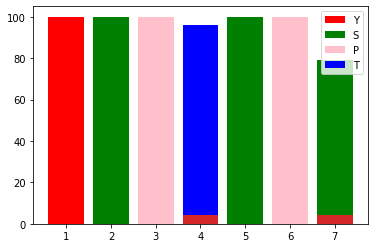

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
for i in np.arange(7):
    amino_acids, percentages = aa_counter(i)    
    print(f"\nAt position {i+1}:")
    for amino_acid, percentage in zip(amino_acids, percentages):
        print(f"{amino_acid} is: {percentage}%")
        ax.bar(i+1, percentage, color = color_dict[amino_acid], label = amino_acid)
# leg_dict = {k: color_dict[k] for k in ('Y','S','P','T')}
leg_dict = {"Y":'red', "S":'green', "P":'pink', "T":'blue'}
plt.legend(leg_dict)
plt.show()